In [19]:
import numpy as np
from tqdm import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
from scipy.stats import zscore, mannwhitneyu
import h5py
import glob

plt.style.use('fivethirtyeight')
def clean_axis(ax):
    ax.xaxis.set_tick_params(labelsize=11)
    ax.yaxis.set_tick_params(labelsize=11)
    for i in ['top', 'bottom', 'left', 'right']:
        ax.spines[i].set_visible(False)
    ax.grid(which='major', linestyle='--', alpha=0.7)
    return True

In [17]:
chroms = ['chr'+str(x) for x in range(1,23)] + ['chrX', 'chrY']
chrom_info = [x.rstrip('\n').split('\t') for x in 
              open('/home/parashar/scratch/hg19_resource/hg19.genome').readlines()]
chrom_info = {x[0]: int(x[1]) for x in chrom_info}

In [53]:
chrom = 'chr1'
exp_s = np.zeros(chrom_info[chrom])
for strand in ['positive', 'negative']:
    scores_dir = '../data/quad_graph_single_base_scores/%s/%s/*_exp_score.npy' % (
        chrom, strand)
    for fn in tqdm(glob.glob(scores_dir), desc="%s %s" % (chrom, strand)):
        exp = np.load(fn)
        if exp.shape[0] > 1:
            e_indices = np.array(exp[:, 0], dtype=int)
            e_scores = np.array([2**(-1/x) if x > 0  else 0 for x in exp[:, 1]], dtype=float)
            exp_s[e_indices] += e_scores

chr1 negative: 100%|██████████| 250/250 [00:10<00:00, 22.81it/s]


In [150]:
shape = np.array(h5py.File(
        '../data/dna_shape/hdf5_files/chr1_HelT.h5')['shape']['HelT'])[:, 0]

In [133]:
exp_s.shape, shape.shape

((249250621,), (249250620,))

In [151]:
idx = np.where((exp_s < 0.00001) & (exp_s > 0))[0]
shape_low = shape[idx]
shape_low = shape_low[~np.isnan(shape_low)]
print (idx.shape)

(3113849,)


In [152]:
idx = np.where(exp_s > 0.1)[0]
shape_hi = shape[idx]
print (idx.shape)

(713691,)


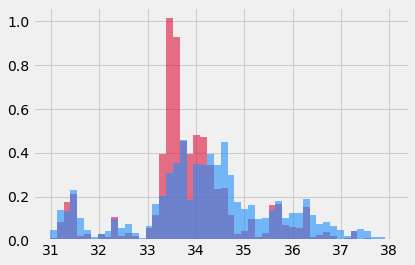

In [153]:
plt.hist(shape_hi, bins=50, alpha=0.6, color='crimson', normed=True)
plt.hist(shape_low, bins=50, alpha=0.6, color='dodgerblue', normed=True)
plt.show()

In [154]:
np.mean(shape_hi), np.mean(shape_low)

(33.895409582017969, 34.244876626965514)

In [156]:
mannwhitneyu(shape_hi, shape_low)

MannwhitneyuResult(statistic=885368663406.5, pvalue=0.0)